In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from skimage import color
from os import listdir
from os.path import isfile, join
import math
import random
import pprint
from skimage import color
#from skimage.measure import structural_similarity as ssim
from skimage.measure import compare_ssim

In [9]:
ipfolder = "C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\bedroomip"
opfolder = "C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\bedroomop"

In [10]:
inpImgList= []

In [11]:
def numeric_chars2(x):
    y = x[5:-4]
    return(int(y))

In [12]:
random.seed(7)

In [13]:
ipfiles = [f for f in os.listdir(ipfolder)]

In [14]:
opfiles = [f for f in os.listdir(opfolder)]

In [15]:
l1 = list(np.random.choice(ipfiles,64,replace=False))
l2 = list(np.random.choice(opfiles,64,replace=False))

In [17]:
l2 = sorted(l2,key = numeric_chars2)
l2

['image53.png',
 'image67.png',
 'image129.png',
 'image203.png',
 'image348.png',
 'image607.png',
 'image877.png',
 'image1040.png',
 'image1149.png',
 'image1253.png',
 'image1360.png',
 'image1361.png',
 'image1531.png',
 'image1614.png',
 'image1701.png',
 'image1710.png',
 'image1786.png',
 'image1800.png',
 'image1843.png',
 'image1902.png',
 'image1983.png',
 'image2029.png',
 'image2067.png',
 'image2140.png',
 'image2166.png',
 'image2169.png',
 'image2198.png',
 'image2252.png',
 'image2269.png',
 'image2458.png',
 'image2554.png',
 'image2618.png',
 'image2736.png',
 'image2749.png',
 'image2773.png',
 'image2911.png',
 'image2938.png',
 'image3136.png',
 'image3205.png',
 'image3265.png',
 'image3415.png',
 'image3437.png',
 'image3459.png',
 'image3505.png',
 'image3520.png',
 'image3529.png',
 'image3545.png',
 'image3550.png',
 'image3738.png',
 'image3927.png',
 'image4379.png',
 'image4486.png',
 'image4715.png',
 'image4719.png',
 'image5115.png',
 'image5143.png',
 

In [18]:
len(l1)

64

In [19]:
def populateImageList(inpImgList,out_img,size):
    listSize = [(size*i)/8 for i in range(0,8)]
    imgList = []
    outImgList = [] 
    for col in listSize:
        for row in listSize:
            area = (row,col,row+(size/8),col+(size/8))
            out_img_grid = out_img.crop(area)
            outImgList.append(out_img_grid)
    imgList.extend(inpImgList)
    imgList.extend(outImgList)
    return imgList

In [20]:
def standardizeImageList(imgList):
    new_width,new_height = 64,64
    imgList = [i.resize((new_width, new_height), Image.ANTIALIAS) for i in imgList]
    return imgList
    
    

In [21]:
def imgToArray(imgList):
    npArray = []
    for i in imgList:
        I = np.asarray(i.convert('L'))
        npArray.append(I)
    return npArray
        

In [29]:
def findssi (imageA , imageB):
    im_np1 = np.asarray(imageA.convert('L'))
    im_np2 = np.asarray(imageB.convert('L'))
    s = compare_ssim(im_np1,im_np2)
    return s

In [23]:
def createDictOfSSIValues(imgList):
    startIndex = 0
    d = {}
    for i in imgList:
        lst = []
        for j in imgList:
            val = findssi(i,j)
            if val == 1:
                val = float("-inf")
            lst.append(val)
        d[startIndex] = lst
        startIndex+=1
    return d

In [30]:
def getAccuracy(d):
    count = 0 
    for k in d.keys():
        valList = d[k]
        maxIndex = valList.index(max(valList))
        if (k <= 63 and maxIndex <=63) or (k > 63 and maxIndex > 63):
            count+=1
    #print("count ",count)
    acc = (count/128.0)*100 
    return acc        
        
    

In [31]:
label = [0 if i<64 else 1 for i in range(128)] #0 indicates input class and 1 output class
opclass = [i for i in range(1,65)]

In [32]:
inpImgList = []
for ip in l1:
    ippath = os.path.join(ipfolder,ip)
    img = Image.open(ippath)
    inpImgList.append(img)


In [36]:
accList = []
d = {}
for opimage in l2:
    oppath = os.path.join(opfolder,opimage)
    out_img = Image.open(oppath)
    size = out_img.size[0]
    imgList = populateImageList(inpImgList,out_img,size)
    imgList = standardizeImageList(imgList)
    d = createDictOfSSIValues(imgList)
    acc = getAccuracy(d)
    accList.append(acc)

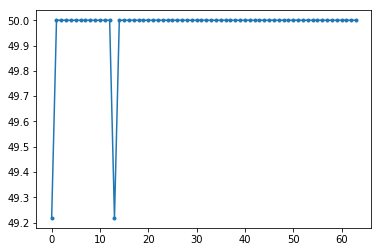

In [37]:
plt.plot(accList,'.-')
plt.show()